In [39]:
%load_ext autoreload
%autoreload 2

In [1]:
import data
import pandas as pd

### Loading data

In [2]:
train = pd.read_csv('./data/train.csv')
store = pd.read_csv('./data/store.csv')

/home/mantas/anaconda3/envs/minicomp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.shape

(637774, 9)

In [4]:
train.dtypes

Date              object
Store            float64
DayOfWeek        float64
Sales            float64
Customers        float64
Open             float64
Promo            float64
StateHoliday      object
SchoolHoliday    float64
dtype: object

In [5]:
train.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


### Cleaning

In [6]:
from cleaning import df_clean

In [7]:
train = df_clean(train)

In [8]:
train.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,353.0,2.0,3139.0,820.0,1.0,0.0,a,1.0
1,2013-01-01,335.0,2.0,2401.0,482.0,1.0,0.0,a,1.0
2,2013-01-01,512.0,2.0,2646.0,625.0,1.0,0.0,a,1.0
3,2013-01-01,494.0,2.0,3113.0,527.0,1.0,0.0,a,1.0
4,2013-01-01,530.0,2.0,2907.0,532.0,1.0,0.0,a,1.0


In [9]:
train.shape

(413964, 9)

In [10]:
train.dtypes

Date             datetime64[ns]
Store                   float64
DayOfWeek               float64
Sales                   float64
Customers               float64
Open                    float64
Promo                   float64
StateHoliday             object
SchoolHoliday           float64
dtype: object

### Adding features

In [11]:
from features import df_add_features

In [12]:
train = df_add_features(train)

In [13]:
train.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekNumber,Month,DayOfYear,SalesPerCustomer
0,2013-01-01,353.0,2.0,3139.0,820.0,1.0,0.0,a,1.0,1,1,1,3.828049
1,2013-01-01,335.0,2.0,2401.0,482.0,1.0,0.0,a,1.0,1,1,1,4.981328
2,2013-01-01,512.0,2.0,2646.0,625.0,1.0,0.0,a,1.0,1,1,1,4.233600
3,2013-01-01,494.0,2.0,3113.0,527.0,1.0,0.0,a,1.0,1,1,1,5.907021
4,2013-01-01,530.0,2.0,2907.0,532.0,1.0,0.0,a,1.0,1,1,1,5.464286


### Splittng and calling model

In [14]:
train_sample = train.sample(frac = 0.01)

In [15]:
#features = ['Customers', 'SalesPerCustomer']

In [16]:
features = ['DayOfWeek', 'WeekNumber', 'Month', 'DayOfYear', 'SalesPerCustomer', 'Customers']

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split


# Split dataset into training set and test set
X=train_sample[features]  # Features
y=train_sample['Sales']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [18]:
from model import model_RFR 
from model import metric

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [20]:
mdl = model_RFR(X_train, y_train)

/home/mantas/DSR/minicomp-rossman/model.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X.values, y.values.reshape(-1,1))


In [21]:
from model import accuracy

In [22]:
from model import model_predict

In [23]:
model_predict(X_test, mdl).values

array([ 4190.94443579, 12092.42886786,  7223.11986896, ...,
       10163.3551813 ,  4117.70287679,  5816.35964189])

In [24]:
mdl.feature_importances_

array([7.35657319e-04, 6.90899964e-05, 2.42242266e-05, 4.26241888e-04,
       1.58189425e-01, 8.40555362e-01])

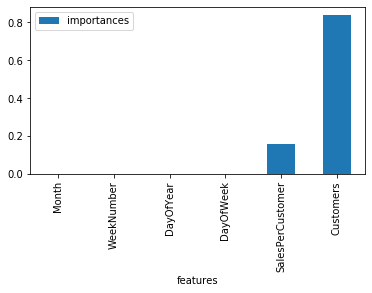

In [25]:
from model import plot_feature_importances
plot_feature_importances(mdl,features)

In [26]:
accuracy(X_test, y_test, mdl)

15.537

In [27]:
mdl2 = model_RFR(X_train, y_train, m=5)

/home/mantas/DSR/minicomp-rossman/model.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X.values, y.values.reshape(-1,1))


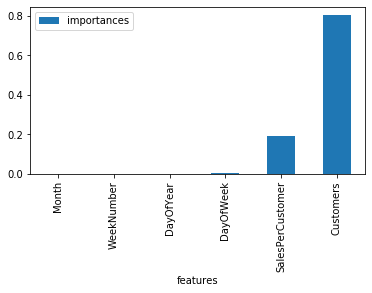

In [28]:
plot_feature_importances(mdl2,features)

In [29]:
accuracy(X_test, y_test, mdl2)

10.009

In [30]:
#mdl = RandomForestClassifier(n_jobs=-1)
#mdl.fit(X_train, y_train)

In [31]:
import pickle, joblib 

In [32]:
filename = 'model.saved'
joblib.dump(mdl, filename)

['model.saved']

In [33]:
loaded_model = joblib.load('model.saved')

In [34]:
accuracy(X_test, y_test, loaded_model)

15.537

In [36]:
#X=df[features]  # Features
#y=df['Sales']  # Labels

In [37]:
def predict_test(df,model,features):
    df = df_clean(df)
    df = df_add_features(df)
    X=df[features]  # Features
    y=df['Sales']  # Labels
    return accuracy(X,y,model)

In [37]:
def predict_test(df,model,features):
    df = df_clean(df)
    df = df_add_features(df)
    X=df[features]  # Features
    y=df['Sales']  # Labels
    return accuracy(X,y,model)

In [38]:
predict_test(train_sample,loaded_model,features)

14.681